In [1]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
happy_results = pd.read_csv('Resources/Data_2022.csv')

In [3]:
happy_results.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [4]:
#Clean the datafram and eliminate all years prior to 2019
clean_file_df = happy_results.loc[(happy_results["year"] >= 2019), :].dropna()
clean_file_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.640,0.420,53.900,0.394,-0.106,0.924,0.324,0.502
12,Afghanistan,2021,2.436,7.324,0.454,54.550,0.394,-0.081,0.946,0.179,0.607
25,Albania,2019,4.995,9.522,0.686,69.100,0.777,-0.101,0.914,0.548,0.274
26,Albania,2020,5.365,9.492,0.710,69.125,0.754,0.004,0.891,0.563,0.265
27,Albania,2021,5.255,9.583,0.702,69.150,0.827,0.041,0.896,0.554,0.254


In [5]:
print(clean_file_df.shape[0])

452


In [6]:
#Clean dataframe and drop unnecessary columns
new_df = clean_file_df.drop(columns=['Log GDP per capita', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect'])
new_df.head()

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
11,Afghanistan,2019,2.375,0.420,53.900,0.924
12,Afghanistan,2021,2.436,0.454,54.550,0.946
25,Albania,2019,4.995,0.686,69.100,0.914
26,Albania,2020,5.365,0.710,69.125,0.891
27,Albania,2021,5.255,0.702,69.150,0.896


In [7]:
new_df.reset_index(drop=True)

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
0,Afghanistan,2019,2.375,0.420,53.900,0.924
1,Afghanistan,2021,2.436,0.454,54.550,0.946
2,Albania,2019,4.995,0.686,69.100,0.914
3,Albania,2020,5.365,0.710,69.125,0.891
4,Albania,2021,5.255,0.702,69.150,0.896
...,...,...,...,...,...,...
447,Zambia,2021,3.082,0.619,55.250,0.824
448,Zimbabwe,2019,2.694,0.759,53.100,0.831
449,Zimbabwe,2020,3.160,0.717,53.575,0.789
450,Zimbabwe,2021,3.155,0.685,54.050,0.757


In [8]:
#Sort test 1 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, True))
sorted_df.head()

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
11,Afghanistan,2019,2.375,0.420,53.9,0.924
2195,Zimbabwe,2019,2.694,0.759,53.1,0.831
844,India,2019,3.249,0.561,60.3,0.752
1647,Rwanda,2019,3.268,0.489,60.2,0.168
2179,Zambia,2019,3.307,0.638,54.4,0.832


In [9]:
#Sort test 1 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, False))
print(sorted_df)

          Country name  year  Life Ladder  Social support  \
634            Finland  2019        7.780           0.937   
1874       Switzerland  2019        7.694           0.949   
518            Denmark  2019        7.693           0.958   
1481            Norway  2019        7.442           0.942   
1392       Netherlands  2019        7.425           0.941   
...                ...   ...          ...             ...   
1192            Malawi  2022        3.356           0.503   
2198          Zimbabwe  2022        3.296           0.666   
442   Congo (Kinshasa)  2022        3.207           0.654   
1709      Sierra Leone  2022        2.560           0.502   
1117           Lebanon  2022        2.352           0.535   

      Healthy life expectancy at birth  Perceptions of corruption  
634                             71.000                      0.195  
1874                            72.500                      0.294  
518                             71.000                      0.1

In [10]:
#Sort test 2 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'])
print(sorted_df.head())


     Country name  year  Life Ladder  Social support  \
11    Afghanistan  2019        2.375           0.420   
2195     Zimbabwe  2019        2.694           0.759   
844         India  2019        3.249           0.561   
1647       Rwanda  2019        3.268           0.489   
2179       Zambia  2019        3.307           0.638   

      Healthy life expectancy at birth  Perceptions of corruption  
11                                53.9                      0.924  
2195                              53.1                      0.831  
844                               60.3                      0.752  
1647                              60.2                      0.168  
2179                              54.4                      0.832  


In [11]:
#Sort test 2 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=False)
print(sorted_df.head())


     Country name  year  Life Ladder  Social support  \
637       Finland  2022        7.729           0.974   
925        Israel  2022        7.662           0.954   
521       Denmark  2022        7.545           0.970   
830       Iceland  2022        7.449           0.985   
1865       Sweden  2022        7.431           0.949   

      Healthy life expectancy at birth  Perceptions of corruption  
637                             71.225                      0.190  
925                             72.850                      0.655  
521                             71.375                      0.203  
830                             72.075                      0.692  
1865                            72.275                      0.213  


In [9]:
#Sort test 3 - part 1
sorted_df = new_df.sort_values('year')

#Get the 5 countries with the highest Life Ladder scores in the selected rows.
highest_life_ladder = sorted_df.nlargest(10, 'Life Ladder')
print('Countries with the highest Ladder Scores:')
print(highest_life_ladder[['Country name', 'year', 'Life Ladder',]])
highest_life_ladder['year'] = highest_life_ladder['year'].astype(str)

Countries with the highest Ladder Scores:
     Country name  year  Life Ladder
635       Finland  2020        7.889
636       Finland  2021        7.794
634       Finland  2019        7.780
637       Finland  2022        7.729
520       Denmark  2021        7.699
1874  Switzerland  2019        7.694
518       Denmark  2019        7.693
925        Israel  2022        7.662
924        Israel  2021        7.578
828       Iceland  2020        7.575


In [22]:
#Sort test 3 - part 2
#Get the 5 countries with the highest Life Ladder scores in the selected
lowest_life_ladder = sorted_df.nsmallest(10, 'Life Ladder')
print('Countries with the lowest Ladder Scores:')
print(lowest_life_ladder[['Country name', 'year', 'Life Ladder']])
lowest_life_ladder['year'] = lowest_life_ladder['year'].astype(str)

Countries with the lowest Ladder Scores:
      Country name  year  Life Ladder
1116       Lebanon  2021        2.179
1117       Lebanon  2022        2.352
11     Afghanistan  2019        2.375
12     Afghanistan  2021        2.436
1709  Sierra Leone  2022        2.560
1115       Lebanon  2020        2.634
2195      Zimbabwe  2019        2.694
2181        Zambia  2021        3.082
2197      Zimbabwe  2021        3.155
2196      Zimbabwe  2020        3.160


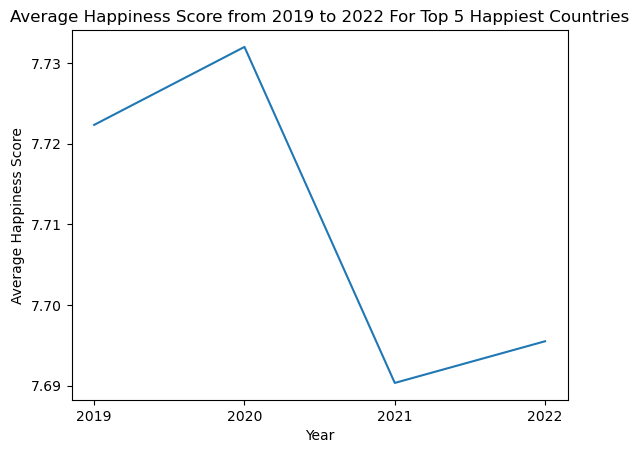

In [23]:
# Calculate the average Happiness Score for each year
yearly_means = highest_life_ladder.groupby('year')['Life Ladder'].mean()



# Create a line plot of the yearly means
plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022 For Top 5 Happiest Countries')
plt.show()


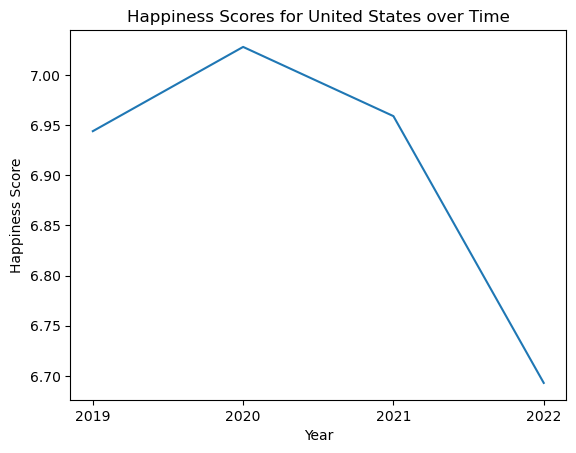

In [20]:
#Line plot of happiness socres over time - US only
sorted_df= sorted_df.loc[sorted_df['Country name'] == 'United States']

sorted_df['year'] = sorted_df['year'].astype(str)

# create a line plot of happiness scores over time
plt.plot(sorted_df['year'], sorted_df['Life Ladder'])

# add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores for United States over Time')

# display the plot
plt.show()

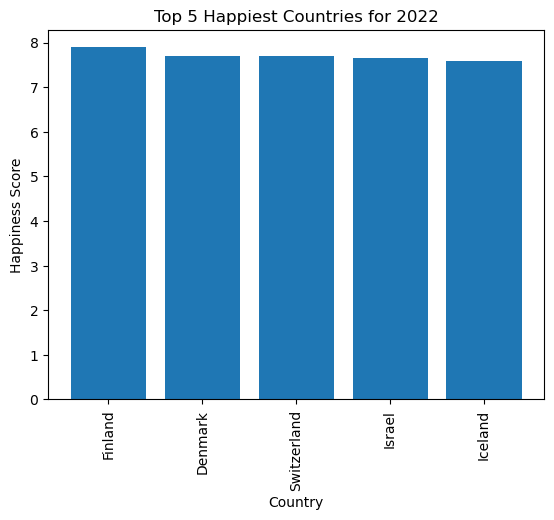

In [16]:
#Bar chart of top 5 happiest countries
# select data for most recent year
figure1 = highest_life_ladder.loc[highest_life_ladder['year'] == 2022]

# sort data by happiness score
figure1 = highest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = highest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(highest_life_ladder['Country name'], highest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

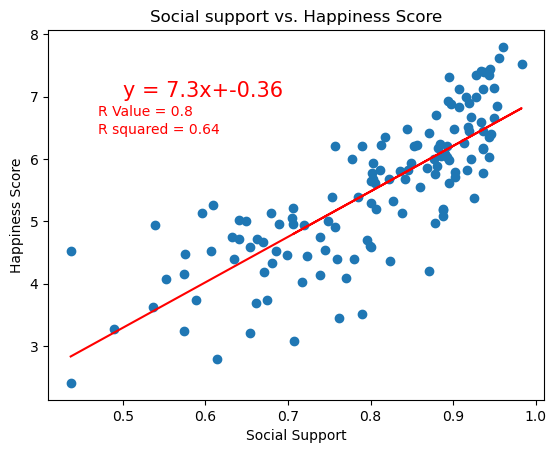

In [14]:
#Scatter plot of happiness score vs. Social Support
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Social support'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Social support vs. Happiness Score')

#perform linear regression
(social_slope, social_intercept, social_rvalue, social_pvalue, social_std_err) = st.linregress(figure2['Social support'], figure2['Life Ladder'])
regress_values = figure2['Social support'] * social_slope + social_intercept
line_eq = "y = " + str(round(social_slope,2)) + "x+" + str(round(social_intercept,2))

#find r^2
social_r_sq = social_rvalue**2
soc_r_annotate = "R squared = " + str(round(social_r_sq,2))
soc_r = "R Value = " + str(round(social_rvalue,2))

#plot regression line
plt.plot(figure2['Social support'],regress_values,"r-")
plt.annotate(line_eq,(0.5,7),fontsize=15,color="red")
plt.annotate(soc_r_annotate,(0.47,6.4),fontsize=10,color="red")
plt.annotate(soc_r,(0.47,6.7),fontsize=10,color='red')


# display the plot
plt.show()



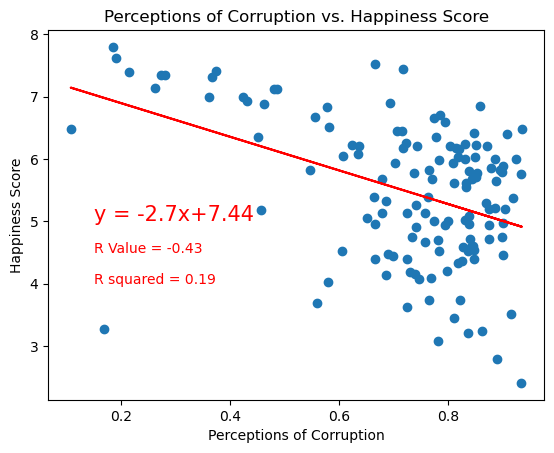

In [15]:
#Scatter plot of happiness score vs. corruption
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Perceptions of corruption'], figure2['Life Ladder'])

# add axis labels and a title
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score')
plt.title('Perceptions of Corruption vs. Happiness Score')

#perform linear regression
(corrupt_slope, corrupt_intercept, corrupt_rvalue, corrupt_pvalue, corrupt_std_err) = st.linregress(figure2['Perceptions of corruption'], figure2['Life Ladder'])
corrupt_regress_values = figure2['Perceptions of corruption'] * corrupt_slope + corrupt_intercept
corrupt_line_eq = "y = " + str(round(corrupt_slope,2)) + "x+" + str(round(corrupt_intercept,2))

#find r^2
corrupt_r_sq = corrupt_rvalue**2
corrupt_r_annotate = "R squared = " + str(round(corrupt_r_sq,2))
corrupt_r = "R Value = " + str(round(corrupt_rvalue,2))


#plot regression line
plt.plot(figure2['Perceptions of corruption'],corrupt_regress_values,"r-")
plt.annotate(corrupt_line_eq,(0.15,5),fontsize=15,color="red")
plt.annotate(corrupt_r_annotate,(0.15,4),fontsize=10,color="red")
plt.annotate(corrupt_r,(0.15,4.5),fontsize=10,color="red")

# display the plot
plt.show()



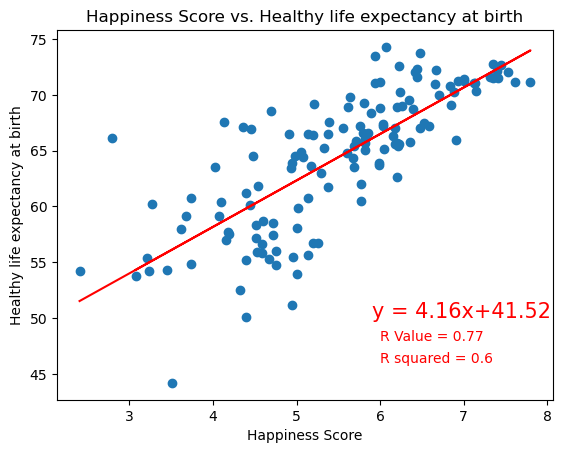

In [16]:
#Scatter plot of happiness score vs. life expectancy
figure2 = sorted_df.groupby('Country name').mean()

# create a scatter plot of happiness score vs.Social Support
plt.scatter(figure2['Life Ladder'],figure2['Healthy life expectancy at birth'])

# add axis labels and a title
plt.ylabel('Healthy life expectancy at birth')
plt.xlabel('Happiness Score')
plt.title('Happiness Score vs. Healthy life expectancy at birth')

#perform linear regression
(life_slope, life_intercept, life_rvalue, life_pvalue, life_std_err) = st.linregress(figure2['Life Ladder'],figure2['Healthy life expectancy at birth'])
life_regress_values = figure2['Life Ladder'] * life_slope + life_intercept
life_line_eq = "y = " + str(round(life_slope,2)) + "x+" + str(round(life_intercept,2))

#find r^2
life_r_sq = life_rvalue**2
life_r_annotate = "R squared = " + str(round(life_r_sq,2))
life_r = "R Value = " + str(round(life_rvalue,2))


#plot regression line
plt.plot(figure2['Life Ladder'],life_regress_values,"r-")
plt.annotate(life_line_eq,(5.9,50),fontsize=15,color="red")
plt.annotate(life_r_annotate,(6,46),fontsize=10,color="red")
plt.annotate(life_r,(6,48),fontsize=10,color="red")


# display the plot
plt.show()

